In [1]:
import pandas as pd
import numpy as np 
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## DATA CLEANING 

In [3]:
##CENSUS 

census = pd.read_csv("US_Population_By_County.csv") #filter out kent county 

kent_census = census[census['Geography'] == 'Kent County, MI']
kent_census = pd.DataFrame(kent_census)
kent_census = kent_census.drop(columns = ["ID Geography", "Geography"])
years = list(range(2013, 2022))
kent_census = kent_census.transpose()
kent_census["Year"] = years
kent_census.rename(columns={1270:'Population'}, inplace=True)
kent_census.set_index('Year', inplace=True)

kent_census.to_csv("Kent_County_Pop_clean.csv")

In [4]:
census

,ID Geography,Geography,Population (2013),Population (2014),Population (2015),Population (2016),Population (2017),Population (2018),Population (2019),Population (2020),Population (2021)
0,05000US01001,"Autauga County, AL",54907.0,55136.0,55221,55049,55036,55200,55380,55639.0,58239.0
1,05000US01003,"Baldwin County, AL",187114.0,191205.0,195121,199510,203360,208107,212830,218289.0,227131.0
2,05000US01005,"Barbour County, AL",27321.0,27119.0,26932,26614,26201,25782,25361,25026.0,25259.0
3,05000US01007,"Bibb County, AL",22754.0,22653.0,22604,22572,22580,22527,22493,22374.0,22412.0
4,05000US01009,"Blount County, AL",57623.0,57645.0,57710,57704,57667,57645,57681,57755.0,58884.0
...,...,...,...,...,...,...,...,...,...,...,...
3215,05000US72147,"Vieques Municipio, PR",9273.0,9217.0,9130,9046,8931,8771,8642,8508.0,8317.0
3216,05000US72149,"Villalba Municipio, PR",25618.0,25196.0,24685,24186,23659,22993,22403,21899.0,22341.0
3217,05000US72151,"Yabucoa Municipio, PR",37404.0,36903.0,36279,35670,35025,34149,33499,32867.0,31047.0
3218,05000US72153,"Yauco Municipio, PR",41194.0,40391.0,39474,38519,37585,36439,35428,34501.0,34704.0


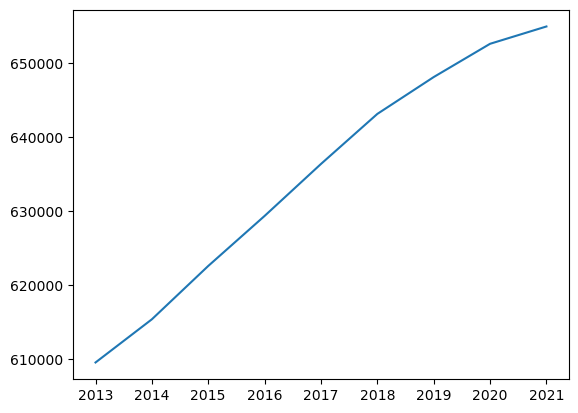

In [38]:
plt.plot(kent_census)

In [6]:
## EVENTS

event_attendees = pd.read_csv("ECC_-_Parks__Number_of_Events_and_Number_of_People_Participating_in_Events_Led_by_the_City.csv")
event_attendees= event_attendees.dropna() #There were very liited NaN values and not many other good methods of fixing 

households_around_parks = pd.read_csv("HE_-_Parks____of_Households_within_a_10-minute_Walk_of_Park_or_Active_Green_Space.csv")
households_around_parks = households_around_parks.drop("Num Value", axis=1) #contains majority NaN

event_attendees.to_csv('ECC_clean.csv')
households_around_parks.to_csv('HE_Parks_clean.csv')

In [9]:
households_around_parks.head()

,FY Start Date,FY End Date,Category,Subcategory,Pct Value,Geocoded Census Tract,FID,Tract CE,GEO ID,Latitude,Longitude,GEO ID Data,Shape Area,Shape Length
0,07/01/2016 12:00:00 AM,06/30/2017 12:00:00 AM,Citywide,Citywide,0.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,07/01/2017 12:00:00 AM,06/30/2018 12:00:00 AM,Citywide,Citywide,0.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07/01/2018 12:00:00 AM,06/30/2019 12:00:00 AM,Citywide,Citywide,0.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,07/01/2019 12:00:00 AM,06/30/2020 12:00:00 AM,Citywide,Citywide,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,07/01/2019 12:00:00 AM,06/30/2020 12:00:00 AM,Census Tract,1,0.95,MULTIPOLYGON (((-85.662304249691 43.0218402027...,58.0,100.0,2.608100e+10,43.02536,-85.647395,14000US26081000100,3.836475e+06,9025.666806


In [40]:
households_around_parks_nongeo = households_around_parks.drop(["Geocoded Census Tract", "FID", "Tract CE",
                                                                    "GEO ID", "Latitude", "Longitude", "GEO ID Data",
                                                                    "Shape Area", "Shape Length"], axis = 1)

households_around_parks_nongeo.to_csv('HE_Parks_nongeo_clean.csv')
#These are the geomarker categories and 20 rows do not have data here.

In [43]:
### DEMOGRAPHIC DATA 
#source: https://datausa.io/profile/geo/grand-rapids-mi

race_eth = pd.read_csv("Race_Ethnicity.csv")

citizenship = pd.read_csv("Citizenship.csv") #filter to mainly kent county + GR
counties= ['kent-county-mi', 'grand-rapids-mi', 'grand-rapids-wyoming-mi', 'grand-rapids-city-area-puma-mi']
citizenship = citizenship[citizenship['Slug Geography'].isin(counties)]

citizenship.to_csv('Citizenship_clean.csv')
race_eth.to_csv('Race_Ethnicity_clean.csv')

### VOTING DATA 

senators = pd.read_csv("US_Senators_Michigan.csv")

reps = pd.read_csv("US_Representatives_Michigan.csv") #filter to District 3
reps = reps[reps["District"] == 3]

pres_vote = pd.read_csv("Presidential_Popular_Vote_Over_Time.csv") 

senators.to_csv('MI_Senators_clean.csv')
reps.to_csv('MI_Reps_clean.csv')
pres_vote.to_csv('Pres_Popular_Vote_clean.csv')

([0, 1, 2, 3],
 [Text(0, 0, 'kent-county-mi'),
  Text(1, 0, 'grand-rapids-mi'),
  Text(2, 0, 'grand-rapids-wyoming-mi'),
  Text(3, 0, 'grand-rapids-city-area-puma-mi')])

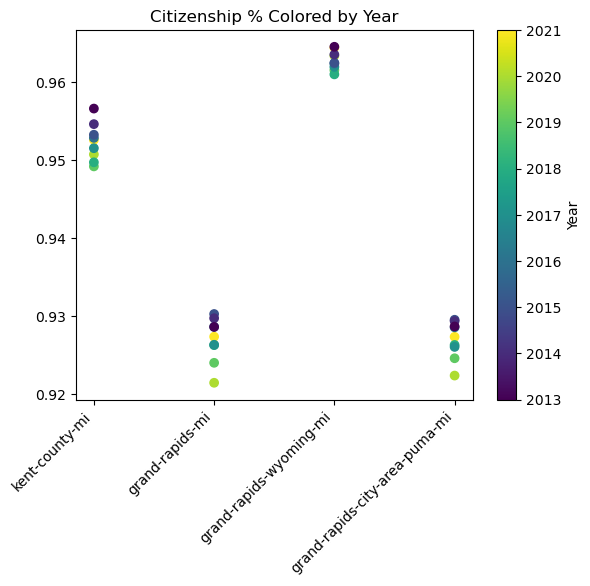

In [44]:
plt.scatter(citizenship["Slug Geography"], citizenship["Citizenship %"], c = citizenship["Year"])
plt.title('Citizenship % Colored by Year')
plt.colorbar(label='Year')
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'White Alone'),
  Text(1, 0, 'Black or African American Alone'),
  Text(2, 0, 'American Indian & Alaska Native Alone'),
  Text(3, 0, 'Asian Alone'),
  Text(4, 0, 'Native Hawaiian & Other Pacific Islander Alone'),
  Text(5, 0, 'Some Other Race Alone'),
  Text(6, 0, 'Two or More Races')])

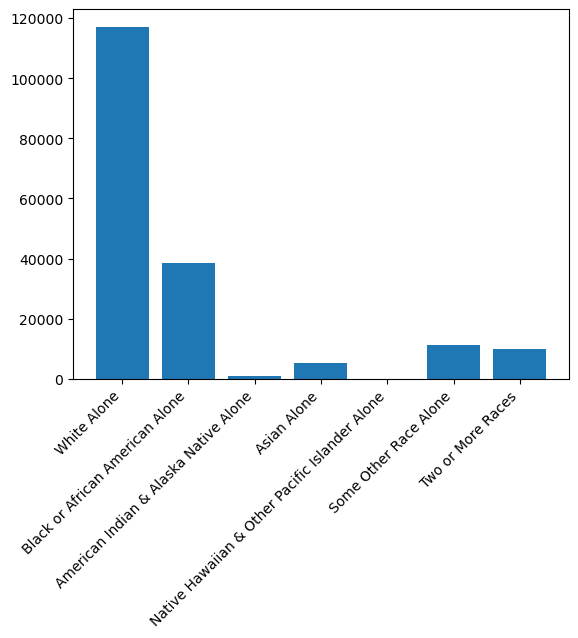

In [45]:
plt.bar(race_eth["Race"], race_eth["Population"])
plt.xticks(rotation=45, ha='right')

In [46]:
### MORE EMP DATA 
#source: https://datausa.io/profile/geo/grand-rapids-mi

industry_emp = pd.read_csv("Employment_by_Industries.csv") #clean NaN values
industry_emp_nona = industry_emp.dropna()
 #drops all profesions with no income data 

occupation_emp = pd.read_csv("Occupations.csv") #clean NaN values
occupation_emp_nona = industry_emp.dropna()
#drops all profesions with no income or growth data 

industry_emp_nona.to_csv('Industry_Employment_clean.csv')
occupation_emp_nona.to_csv('Occupation_clean.csv')

In [47]:
### INCOME DATA (ANIESSA)
EPA = pd.read_csv('EPA_-_Percent_of_Residents_Earning_above_the_Asset_Limited__Income_Constrained__Employed__ALICE__Threshold.csv')

GE = pd.read_csv('GE_-_Human_Resources_Employment_Data.csv')
for i in range(len(GE)):
    ###Turning the Date column in datetime objects and dropping the time
    GE.loc[i,'Date Reported'] = datetime.strptime(GE.loc[i,'Date Reported'][:10], "%m/%d/%Y").date()
    
emp_stats = pd.read_csv('Employment_Statistics.csv')
gr_emp = emp_stats[emp_stats['Name']=='Grand Rapids city, MI']

In [50]:
## things to look at 
# - what are crime rates like after city events are hosted?
# - how has the population and demographic population changed? has this affected crime or voting habits?
# - haw do governemnt spending habits relate to crime rates?
# - is there any correlation between surrounding park population and event attendees?
# - have unemployement rates impacted city spending or crime rates?
# - do any weather events or trends correlate with any other topics?